In [1]:
# Import 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import csv
import datetime
#from geopy import distance
#from config import gkey
import numpy as np
import time
#import gmaps
#import gmaps.datasets
#from googlemaps import Client as GoogleMaps
import requests
import calendar
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec


In [2]:
# find the file path of where the "all_2022_df.csv is saved on your particular local drive"

csv_path = "/Users/joelw/GitHub/Project_1_Repo/unclean_2022_data/all_2022_df.csv"
all_2022_df = pd.read_csv(csv_path,low_memory=False)
all_2022_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member
1,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member
2,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member
3,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual
4,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual


In [3]:
# Rename Columns
all_2022_df.rename(columns={"ride_id":"Ride ID", "rideable_type":"Bike Type", "started_at": "Start Date", "ended_at": "End Date", "start_station_name": "Start Station", "start_station_id":"Start Station ID","end_station_name":"End Station", "end_station_id":"End Station ID","start_lat": "Starting Lat", "start_lng": "Starting Lng", "end_lat": "Ending Lat", "end_lng":"Ending Lng","member_casual": "Member type"},inplace=True)

In [4]:
# Print renamed columns
all_2022_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type
0,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member
1,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member
2,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member
3,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual
4,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual


In [5]:
#drop null values
all_2022_df.dropna(how='any')

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type
0,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member
1,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member
2,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member
3,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual
4,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476777,67E741F530DD586C,electric_bike,2022-05-02 12:53:30,2022-05-02 13:04:58,North Capitol St & F St NW,31624.0,Hamlin & 7th St NE,31514.0,38.897424,-77.009831,38.927497,-76.997194,member
3476778,F3F9114CB26732B7,classic_bike,2022-05-15 15:45:07,2022-05-15 16:16:33,15th St & Constitution Ave NW,31321.0,Maine Ave & 9th St SW,31646.0,38.892244,-77.033234,38.880440,-77.025236,member
3476779,607CDB3106072FBA,classic_bike,2022-05-17 12:12:33,2022-05-17 12:15:10,North Capitol St & F St NW,31624.0,1st & H St NW,31638.0,38.897446,-77.009888,38.900358,-77.012108,member
3476780,9C651D592BACDDC3,classic_bike,2022-05-19 18:16:14,2022-05-19 18:58:55,Metro Center / 12th & G St NW,31230.0,1st & H St NW,31638.0,38.898364,-77.027869,38.900358,-77.012108,member


In [6]:
#seperate date from time and populate day of week column
all_2022_df['Start Date']=pd.to_datetime(all_2022_df['Start Date'])
all_2022_df['End Date']=pd.to_datetime(all_2022_df['End Date'])
all_2022_df['Day of Week']=all_2022_df['Start Date'].dt.day_name()
all_2022_df['Year']=all_2022_df['Start Date'].dt.year
all_2022_df['Year']=pd.to_numeric(all_2022_df['Year'])
all_2022_df["Month"] = all_2022_df["Start Date"].dt.month
all_2022_df['Month'] = all_2022_df['Month'].apply(lambda x: calendar.month_abbr[x])
all_2022_df.head()


,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Month
0,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member,Friday,2022,Sep
1,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member,Thursday,2022,Sep
2,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member,Friday,2022,Sep
3,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual,Thursday,2022,Sep
4,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual,Tuesday,2022,Sep


In [7]:
all_2022_df['Day Type'] = all_2022_df['Start Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [8]:
# calculates the bike ride/rental duration by subtracting end time from start time

all_2022_df['Duration']= (all_2022_df['End Date'] - all_2022_df['Start Date']).dt.total_seconds()
all_2022_df['Duration']= all_2022_df[['Duration']].astype(int)
all_2022_df.sample(5)


,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Month,Day Type,Duration
447489,E2C83AA1E391FF93,classic_bike,2022-06-01 18:37:45,2022-06-01 19:00:02,4th & East Capitol St NE,31618.0,Lincoln Memorial,31258.0,38.889955,-77.000349,38.888255,-77.049436,casual,Wednesday,2022,Jun,Weekday,1337
121776,2A5638D24D63B9FC,classic_bike,2022-09-30 13:21:40,2022-09-30 13:30:58,14th & Otis Pl NW,31131.0,8th & V St NW,31134.0,38.934405,-77.032687,38.917716,-77.022684,member,Friday,2022,Sep,Weekday,558
1006981,4EA70861BA634348,classic_bike,2022-10-27 17:20:05,2022-10-27 17:31:31,US Dept of State / Virginia Ave & 21st St NW,31220.0,17th & P St NW,31330.0,38.894919,-77.046587,38.909858,-77.038566,member,Thursday,2022,Oct,Weekday,686
1879993,494EEC83EB416601,classic_bike,2022-08-22 08:41:42,2022-08-22 08:53:27,4th & E St SW,31244.0,1st & M St SE,31650.0,38.884120,-77.017445,38.876893,-77.006072,casual,Monday,2022,Aug,Weekday,705
2108735,0FDCA4172D8FCB84,classic_bike,2022-11-29 10:00:10,2022-11-29 10:14:21,Wilson Blvd & N Quinn St,31027.0,Fairfax Dr & N Randolph St,31034.0,38.893993,-77.078570,38.882629,-77.109366,member,Tuesday,2022,Nov,Weekday,851


In [9]:
# Convert "Start Date" and "End Date" columns to datetime
all_2022_df['Start Date'] = pd.to_datetime(all_2022_df['Start Date'])
all_2022_df['End Date'] = pd.to_datetime(all_2022_df['End Date'])

# Create new columns for time components
all_2022_df['Start Time'] = all_2022_df['Start Date'].dt.time
all_2022_df['End Time'] = all_2022_df['End Date'].dt.time

# Convert "Start Date" and "End Date" columns to date
all_2022_df['Start Date'] = all_2022_df['Start Date'].dt.date
all_2022_df['End Date'] = all_2022_df['End Date'].dt.date

# Convert "Start Date" and "End Date" columns back to datetime with combined date and time
all_2022_df['Start Date'] = pd.to_datetime(all_2022_df['Start Date'].astype(str) + ' ' + all_2022_df['Start Time'].astype(str))
all_2022_df['End Date'] = pd.to_datetime(all_2022_df['End Date'].astype(str) + ' ' + all_2022_df['End Time'].astype(str))

# Convert "Start Date" column to datetime
all_2022_df['Start Date'] = pd.to_datetime(all_2022_df['Start Date'])

# Extract day of the week and year
all_2022_df['Day of Week'] = all_2022_df['Start Date'].dt.day_name()
all_2022_df['Year'] = all_2022_df['Start Date'].dt.year
all_2022_df['Year'] = pd.to_numeric(all_2022_df['Year'])

# Display the updated DataFrame
all_2022_df.head()



,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Month,Day Type,Duration,Start Time,End Time
0,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member,Friday,2022,Sep,Weekday,49484,18:42:27,08:27:11
1,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member,Thursday,2022,Sep,Weekday,898,01:35:01,01:49:59
2,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member,Friday,2022,Sep,Weekday,269,17:04:11,17:08:40
3,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual,Thursday,2022,Sep,Weekday,4064,17:24:21,18:32:05
4,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual,Tuesday,2022,Sep,Weekday,2642,23:51:12,00:35:14


In [10]:
# Remove time from "Start Date" and "End Date" columns
all_2022_df['Start Date'] = all_2022_df['Start Date'].dt.date
all_2022_df['End Date'] = all_2022_df['End Date'].dt.date

# Display the updated DataFrame
all_2022_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Month,Day Type,Duration,Start Time,End Time
0,C40CF15D0DBE584E,classic_bike,2022-09-23,2022-09-24,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member,Friday,2022,Sep,Weekday,49484,18:42:27,08:27:11
1,3788C1944643B399,classic_bike,2022-09-22,2022-09-22,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member,Thursday,2022,Sep,Weekday,898,01:35:01,01:49:59
2,A9E14A3286BB0922,classic_bike,2022-09-16,2022-09-16,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member,Friday,2022,Sep,Weekday,269,17:04:11,17:08:40
3,77518ADEB4313901,classic_bike,2022-09-29,2022-09-29,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual,Thursday,2022,Sep,Weekday,4064,17:24:21,18:32:05
4,7B99FCADC829EAC0,classic_bike,2022-09-13,2022-09-14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual,Tuesday,2022,Sep,Weekday,2642,23:51:12,00:35:14


In [11]:
# Get today's date
today = datetime.date.today()

# Convert "Start Time" and "End Time" to datetime
all_2022_df['Start Time'] = pd.to_datetime(today.strftime('%Y-%m-%d') + ' ' + all_2022_df['Start Time'].astype(str))
all_2022_df['End Time'] = pd.to_datetime(today.strftime('%Y-%m-%d') + ' ' + all_2022_df['End Time'].astype(str))

# Convert time to AM/PM format
all_2022_df['Start Time'] = all_2022_df['Start Time'].dt.strftime('%I:%M %p')
all_2022_df['End Time'] = all_2022_df['End Time'].dt.strftime('%I:%M %p')

# Display the updated DataFrame
all_2022_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Month,Day Type,Duration,Start Time,End Time
0,C40CF15D0DBE584E,classic_bike,2022-09-23,2022-09-24,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member,Friday,2022,Sep,Weekday,49484,06:42 PM,08:27 AM
1,3788C1944643B399,classic_bike,2022-09-22,2022-09-22,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member,Thursday,2022,Sep,Weekday,898,01:35 AM,01:49 AM
2,A9E14A3286BB0922,classic_bike,2022-09-16,2022-09-16,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member,Friday,2022,Sep,Weekday,269,05:04 PM,05:08 PM
3,77518ADEB4313901,classic_bike,2022-09-29,2022-09-29,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual,Thursday,2022,Sep,Weekday,4064,05:24 PM,06:32 PM
4,7B99FCADC829EAC0,classic_bike,2022-09-13,2022-09-14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual,Tuesday,2022,Sep,Weekday,2642,11:51 PM,12:35 AM


In [12]:
all_2022_df.to_csv('all_2022_data.csv', index=False)

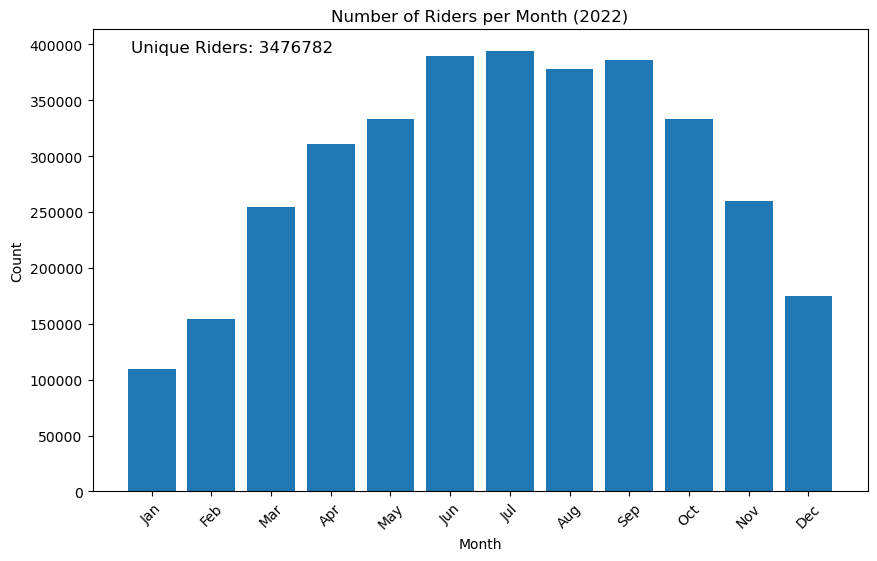

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Month' column to categorical data type with custom order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
all_2022_df['Month'] = pd.Categorical(all_2022_df['Month'], categories=month_order, ordered=True)

# Count the occurrences of each month
monthly_counts = all_2022_df['Month'].value_counts()

# Sort the counts by month order
monthly_counts = monthly_counts.sort_index()

# Count the unique Rider IDs
unique_rider_count = all_2022_df['Ride ID'].nunique()

# Calculate the average count
average_count = monthly_counts.mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Riders per Month (2022)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add the count and average as text annotations on the plot
plt.text(0.05, 0.95, f'Unique Riders: {unique_rider_count}', transform=plt.gca().transAxes, fontsize=12)
#plt.text(0.05, 0.90, f'Average Count: {average_count:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Display the plot
plt.savefig('2022 Monthly Riders')
plt.show()
